In [1]:
import gym
import random
import numpy as np
import tqdm

from lib.q_learning import QLeaning

# Hyper parameters

In [2]:
total_episodes = 500000       # Total episodes
learning_rate = 0.9           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.00001            # Exponential decay rate for exploration prob

# Initialize environment

In [3]:
env = gym.make("FrozenLake8x8-v0")
env.action_space.n, env.observation_space.n

(4, 64)

In [ ]:
rewards_by_gammas = []
gammas = [1.0, 0.99, 0.95, 0.9, 0.5, 0.1, 0.01]

for gamma in gammas:
    agent = QLeaning(action_size=env.action_space.n,
                    state_size=env.observation_space.n)
    rewards = []
    for episode in tqdm.tqdm(range(total_episodes)):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0

        for step in range(max_steps):
            exp_exp_tradeoff = random.uniform(0, 1)

            if exp_exp_tradeoff > epsilon:
                # exploitation
                action = agent.get_action(state)
            else:
                # exploration
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            agent.update(state, action, new_state, reward, learning_rate, gamma)

            total_rewards += reward

            # Our new state is state
            state = new_state

            # If done (if we're dead) : finish episode
            if done == True:
                break

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
        rewards.append(total_rewards)
    rewards_by_gammas.append(rewards)


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from lib.utils import SMA

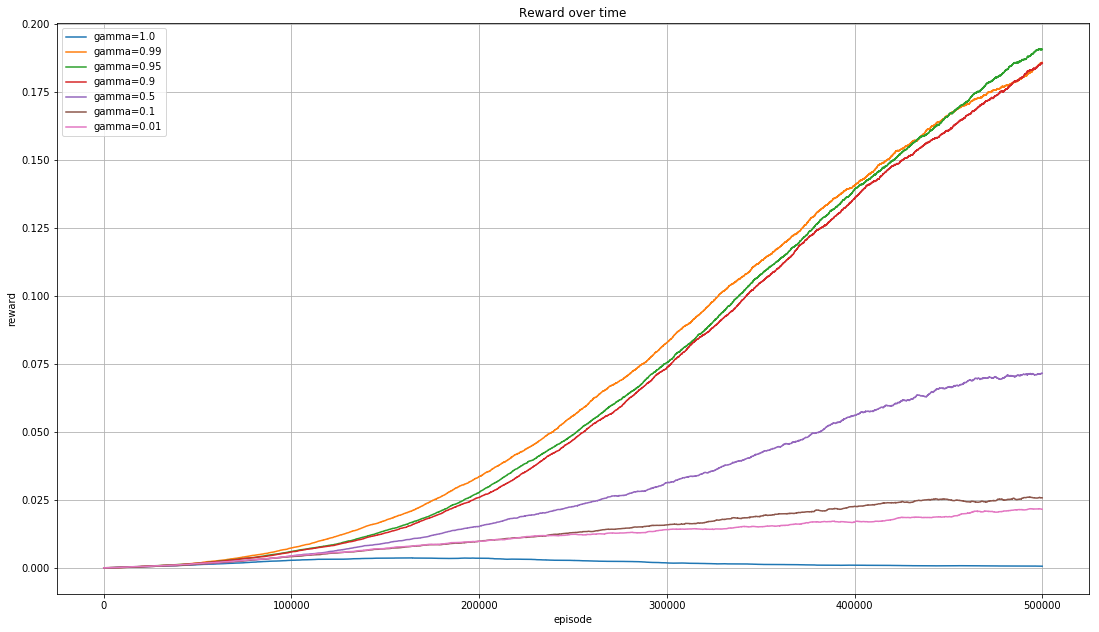

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

for rewards, gamma in zip(rewards_by_gammas, gammas):
    smoothed_rewards = SMA(rewards, 100000)

    x = list(range(len(smoothed_rewards)))
    y = smoothed_rewards

    ax.plot(x, y, label='gamma={}'.format(gamma))

ax.legend()
ax.set(xlabel='episode', ylabel='reward',
       title='Reward over time')
ax.grid()

plt.show()


# Note
- Discounting future reward is a must.